In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

In [16]:
options = pd.read_csv("options_data.csv",parse_dates=['date','exdate','last_date'])
pd.set_option('display.max_columns', None)
options.head()

C:\Users\petso\AppData\Local\Temp\ipykernel_10232\414319335.py:1: DtypeWarning: Columns (23,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  options = pd.read_csv("options_data.csv",parse_dates=['date','exdate','last_date'])


,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
0,101121,2022-02-28,AMD 220304P143000,1,2022-03-04,2022-02-28,P,143000,18.30,21.70,1,43,0.919996,-0.931618,0.011129,1.700479,-71.04977,144642442,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
1,101121,2022-02-28,AMD 220304P144000,1,2022-03-04,2022-02-22,P,144000,19.65,22.55,0,8,1.009123,-0.921234,0.011298,1.898582,-86.91409,144642443,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
2,101121,2022-02-28,AMD 220304P145000,1,2022-03-04,2022-02-28,P,145000,20.45,23.70,3,154,1.029200,-0.926204,0.010543,1.805097,-84.34332,144642444,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
3,101121,2022-02-28,AMD 220304P146000,1,2022-03-04,2022-02-28,P,146000,21.30,24.75,10,72,1.032943,-0.933979,0.009645,1.653858,-77.66636,144642445,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
4,101121,2022-02-28,AMD 220304P147000,1,2022-03-04,2022-02-28,P,147000,23.50,25.75,6,86,1.347105,-0.879729,0.011528,2.587893,-158.53520,144642446,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN


In [17]:
options = options[["date","symbol","exdate","last_date","strike_price","best_bid","best_offer","volume","open_interest","impl_volatility","delta","gamma","theta","vega","optionid","ticker"]]
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000,18.30,21.70,1,43,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442,AMD
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000,19.65,22.55,0,8,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443,AMD
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000,20.45,23.70,3,154,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444,AMD
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000,21.30,24.75,10,72,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445,AMD
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000,23.50,25.75,6,86,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386113,2023-02-28,SMCI 231215P75000,2023-12-15,2023-02-27,75000,8.10,9.10,0,24,0.629463,-0.208292,0.005324,-8.634860,24.983320,151307652,SMCI
1386114,2023-02-28,SMCI 231215P80000,2023-12-15,2023-02-28,80000,9.80,10.90,1,48,0.618646,-0.242801,0.005933,-9.147098,27.217950,151307653,SMCI
1386115,2023-02-28,SMCI 231215P85000,2023-12-15,2023-02-27,85000,11.80,12.60,0,10,0.605194,-0.279102,0.006550,-9.484104,29.219490,151307654,SMCI
1386116,2023-02-28,SMCI 231215P90000,2023-12-15,2023-02-28,90000,13.90,14.60,101,27,0.592809,-0.317389,0.007135,-9.707250,30.943880,151307655,SMCI


In [18]:
options['strike_price'] = [float(i) for i in options['strike_price']]
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1,43,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442,AMD
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0,8,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443,AMD
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3,154,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444,AMD
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10,72,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445,AMD
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6,86,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386113,2023-02-28,SMCI 231215P75000,2023-12-15,2023-02-27,75000.0,8.10,9.10,0,24,0.629463,-0.208292,0.005324,-8.634860,24.983320,151307652,SMCI
1386114,2023-02-28,SMCI 231215P80000,2023-12-15,2023-02-28,80000.0,9.80,10.90,1,48,0.618646,-0.242801,0.005933,-9.147098,27.217950,151307653,SMCI
1386115,2023-02-28,SMCI 231215P85000,2023-12-15,2023-02-27,85000.0,11.80,12.60,0,10,0.605194,-0.279102,0.006550,-9.484104,29.219490,151307654,SMCI
1386116,2023-02-28,SMCI 231215P90000,2023-12-15,2023-02-28,90000.0,13.90,14.60,101,27,0.592809,-0.317389,0.007135,-9.707250,30.943880,151307655,SMCI


In [19]:
for j in options.columns[-12:-2]:
    options[j] = [float(i) for i in options[j]]

In [20]:
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442,AMD
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443,AMD
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444,AMD
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445,AMD
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386113,2023-02-28,SMCI 231215P75000,2023-12-15,2023-02-27,75000.0,8.10,9.10,0.0,24.0,0.629463,-0.208292,0.005324,-8.634860,24.983320,151307652,SMCI
1386114,2023-02-28,SMCI 231215P80000,2023-12-15,2023-02-28,80000.0,9.80,10.90,1.0,48.0,0.618646,-0.242801,0.005933,-9.147098,27.217950,151307653,SMCI
1386115,2023-02-28,SMCI 231215P85000,2023-12-15,2023-02-27,85000.0,11.80,12.60,0.0,10.0,0.605194,-0.279102,0.006550,-9.484104,29.219490,151307654,SMCI
1386116,2023-02-28,SMCI 231215P90000,2023-12-15,2023-02-28,90000.0,13.90,14.60,101.0,27.0,0.592809,-0.317389,0.007135,-9.707250,30.943880,151307655,SMCI


In [21]:
type(options.iloc[3][5])

C:\Users\petso\AppData\Local\Temp\ipykernel_10232\1917044309.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(options.iloc[3][5])


numpy.float64

In [22]:
from scipy.stats import norm

In [23]:
N = norm.cdf

In [24]:
amd_stock = pd.read_csv("AMD.csv", parse_dates=['Date'])
amd_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
1,2022-03-01,122.330002,122.430000,112.800003,113.830002,113.830002,126552200
2,2022-03-02,115.470001,119.480003,113.309998,118.279999,118.279999,118354500
3,2022-03-03,118.129997,118.260002,111.050003,111.980003,111.980003,123916700
4,2022-03-04,112.000000,113.000000,106.809998,108.410004,108.410004,100609400
...,...,...,...,...,...,...,...
247,2023-02-22,76.930000,78.129997,75.919998,76.610001,76.610001,50286800
248,2023-02-23,80.629997,81.790001,77.970001,79.750000,79.750000,76391300
249,2023-02-24,77.750000,78.809998,76.940002,78.089996,78.089996,46700000
250,2023-02-27,79.639999,80.120003,78.529999,78.769997,78.769997,45617300


In [25]:
options.loc[options.date=='2023-10-11']

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker


In [26]:
l1 = options.date
l1

0         2022-02-28
1         2022-02-28
2         2022-02-28
3         2022-02-28
4         2022-02-28
             ...    
1386113   2023-02-28
1386114   2023-02-28
1386115   2023-02-28
1386116   2023-02-28
1386117   2023-02-28
Name: date, Length: 1386118, dtype: datetime64[ns]

In [27]:
l2 = l1.groupby(options.date)

In [28]:
l2

In [29]:
len(l2)

252

In [30]:
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442,AMD
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443,AMD
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444,AMD
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445,AMD
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386113,2023-02-28,SMCI 231215P75000,2023-12-15,2023-02-27,75000.0,8.10,9.10,0.0,24.0,0.629463,-0.208292,0.005324,-8.634860,24.983320,151307652,SMCI
1386114,2023-02-28,SMCI 231215P80000,2023-12-15,2023-02-28,80000.0,9.80,10.90,1.0,48.0,0.618646,-0.242801,0.005933,-9.147098,27.217950,151307653,SMCI
1386115,2023-02-28,SMCI 231215P85000,2023-12-15,2023-02-27,85000.0,11.80,12.60,0.0,10.0,0.605194,-0.279102,0.006550,-9.484104,29.219490,151307654,SMCI
1386116,2023-02-28,SMCI 231215P90000,2023-12-15,2023-02-28,90000.0,13.90,14.60,101.0,27.0,0.592809,-0.317389,0.007135,-9.707250,30.943880,151307655,SMCI


In [31]:
amd_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
1,2022-03-01,122.330002,122.430000,112.800003,113.830002,113.830002,126552200
2,2022-03-02,115.470001,119.480003,113.309998,118.279999,118.279999,118354500
3,2022-03-03,118.129997,118.260002,111.050003,111.980003,111.980003,123916700
4,2022-03-04,112.000000,113.000000,106.809998,108.410004,108.410004,100609400
...,...,...,...,...,...,...,...
247,2023-02-22,76.930000,78.129997,75.919998,76.610001,76.610001,50286800
248,2023-02-23,80.629997,81.790001,77.970001,79.750000,79.750000,76391300
249,2023-02-24,77.750000,78.809998,76.940002,78.089996,78.089996,46700000
250,2023-02-27,79.639999,80.120003,78.529999,78.769997,78.769997,45617300


In [32]:
amd_stock['date'] = amd_stock.Date

In [33]:
amd_stock = amd_stock[['date','Open','High','Low','Close','Adj Close','Volume']]
amd_stock

,date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
1,2022-03-01,122.330002,122.430000,112.800003,113.830002,113.830002,126552200
2,2022-03-02,115.470001,119.480003,113.309998,118.279999,118.279999,118354500
3,2022-03-03,118.129997,118.260002,111.050003,111.980003,111.980003,123916700
4,2022-03-04,112.000000,113.000000,106.809998,108.410004,108.410004,100609400
...,...,...,...,...,...,...,...
247,2023-02-22,76.930000,78.129997,75.919998,76.610001,76.610001,50286800
248,2023-02-23,80.629997,81.790001,77.970001,79.750000,79.750000,76391300
249,2023-02-24,77.750000,78.809998,76.940002,78.089996,78.089996,46700000
250,2023-02-27,79.639999,80.120003,78.529999,78.769997,78.769997,45617300


In [34]:
amd_stock['ticker'] = ['AMD' for i in range(252)]

In [35]:
amd_stock

,date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2022-02-28,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,AMD
1,2022-03-01,122.330002,122.430000,112.800003,113.830002,113.830002,126552200,AMD
2,2022-03-02,115.470001,119.480003,113.309998,118.279999,118.279999,118354500,AMD
3,2022-03-03,118.129997,118.260002,111.050003,111.980003,111.980003,123916700,AMD
4,2022-03-04,112.000000,113.000000,106.809998,108.410004,108.410004,100609400,AMD
...,...,...,...,...,...,...,...,...
247,2023-02-22,76.930000,78.129997,75.919998,76.610001,76.610001,50286800,AMD
248,2023-02-23,80.629997,81.790001,77.970001,79.750000,79.750000,76391300,AMD
249,2023-02-24,77.750000,78.809998,76.940002,78.089996,78.089996,46700000,AMD
250,2023-02-27,79.639999,80.120003,78.529999,78.769997,78.769997,45617300,AMD


In [36]:
smci_stock = pd.read_csv("SMCI.csv", parse_dates=['Date'])
smci_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,39.549999,40.660000,38.900002,39.290001,39.290001,312700
1,2022-03-01,39.270000,40.349998,38.779999,39.900002,39.900002,362300
2,2022-03-02,40.130001,42.459999,40.130001,42.169998,42.169998,261000
3,2022-03-03,42.369999,42.950001,41.680000,42.110001,42.110001,171100
4,2022-03-04,41.599998,41.919998,40.430000,41.570000,41.570000,175000
...,...,...,...,...,...,...,...
247,2023-02-22,87.589996,88.720001,85.610001,86.709999,86.709999,871000
248,2023-02-23,89.330002,94.949997,89.300003,94.269997,94.269997,1832800
249,2023-02-24,92.480003,98.360001,91.959999,98.160004,98.160004,1945100
250,2023-02-27,98.860001,103.980003,98.699997,101.129997,101.129997,1891100


In [37]:
nvda_stock = pd.read_csv("NVDA.csv",parse_dates=['Date'])
nvda_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,239.919998,246.649994,237.070007,243.850006,243.502747,47731900
1,2022-03-01,242.910004,243.770004,231.320007,234.770004,234.435654,41205600
2,2022-03-02,237.559998,244.089996,234.149994,242.199997,241.896255,38964200
3,2022-03-03,242.619995,243.259995,234.690002,237.139999,236.842636,36509500
4,2022-03-04,233.839996,236.800003,224.820007,229.360001,229.072357,43141500
...,...,...,...,...,...,...,...
247,2023-02-22,207.070007,211.039993,204.210007,207.539993,207.438217,51318400
248,2023-02-23,234.399994,238.880005,230.250000,236.639999,236.523972,111799500
249,2023-02-24,232.250000,234.740005,229.470001,232.860001,232.745804,58971600
250,2023-02-27,236.699997,238.800003,234.539993,235.009995,234.894745,45299400


In [38]:
tsm_stock = pd.read_csv("TSM.csv",parse_dates=['Date'])
tsm_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,109.370003,109.769997,105.000000,107.010002,102.336174,26390800
1,2022-03-01,110.000000,111.110001,107.050003,108.050003,103.330750,20377900
2,2022-03-02,108.400002,109.970001,107.860001,109.610001,104.822601,13342400
3,2022-03-03,109.910004,110.000000,107.599998,108.790001,104.038422,10841700
4,2022-03-04,107.000000,108.120003,103.809998,105.059998,100.471336,22372100
...,...,...,...,...,...,...,...
247,2023-02-22,87.750000,88.089996,86.660004,86.830002,84.830009,10106400
248,2023-02-23,90.300003,91.989998,89.459999,90.080002,88.005150,15468300
249,2023-02-24,88.089996,88.150002,87.239998,88.110001,86.080528,8817600
250,2023-02-27,88.699997,88.849998,87.239998,87.300003,85.289185,10609400


In [39]:
smci_stock['date'] = smci_stock.Date
smci_stock = smci_stock[['date','Open','High','Low','Close','Adj Close','Volume']]
smci_stock['ticker'] = ['SMCI' for i in range(252)]
tsm_stock['date'] = tsm_stock.Date
tsm_stock = tsm_stock[['date','Open','High','Low','Close','Adj Close','Volume']]
tsm_stock['ticker'] = ['TSM' for i in range(252)]
nvda_stock['date'] = nvda_stock.Date
nvda_stock = nvda_stock[['date','Open','High','Low','Close','Adj Close','Volume']]
nvda_stock['ticker'] = ['NVDA' for i in range(252)]

In [40]:
nvda_stock

,date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2022-02-28,239.919998,246.649994,237.070007,243.850006,243.502747,47731900,NVDA
1,2022-03-01,242.910004,243.770004,231.320007,234.770004,234.435654,41205600,NVDA
2,2022-03-02,237.559998,244.089996,234.149994,242.199997,241.896255,38964200,NVDA
3,2022-03-03,242.619995,243.259995,234.690002,237.139999,236.842636,36509500,NVDA
4,2022-03-04,233.839996,236.800003,224.820007,229.360001,229.072357,43141500,NVDA
...,...,...,...,...,...,...,...,...
247,2023-02-22,207.070007,211.039993,204.210007,207.539993,207.438217,51318400,NVDA
248,2023-02-23,234.399994,238.880005,230.250000,236.639999,236.523972,111799500,NVDA
249,2023-02-24,232.250000,234.740005,229.470001,232.860001,232.745804,58971600,NVDA
250,2023-02-27,236.699997,238.800003,234.539993,235.009995,234.894745,45299400,NVDA


In [41]:
stock_price_data = pd.concat([amd_stock,nvda_stock,tsm_stock,smci_stock],axis=0)
stock_price_data

,date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2022-02-28,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,AMD
1,2022-03-01,122.330002,122.430000,112.800003,113.830002,113.830002,126552200,AMD
2,2022-03-02,115.470001,119.480003,113.309998,118.279999,118.279999,118354500,AMD
3,2022-03-03,118.129997,118.260002,111.050003,111.980003,111.980003,123916700,AMD
4,2022-03-04,112.000000,113.000000,106.809998,108.410004,108.410004,100609400,AMD
...,...,...,...,...,...,...,...,...
247,2023-02-22,87.589996,88.720001,85.610001,86.709999,86.709999,871000,SMCI
248,2023-02-23,89.330002,94.949997,89.300003,94.269997,94.269997,1832800,SMCI
249,2023-02-24,92.480003,98.360001,91.959999,98.160004,98.160004,1945100,SMCI
250,2023-02-27,98.860001,103.980003,98.699997,101.129997,101.129997,1891100,SMCI


In [42]:
options = pd.merge(options,stock_price_data,on=['date','ticker'],how='outer')
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386113,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400
1386114,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400
1386115,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400
1386116,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400


In [43]:
options['time_to_expiration'] = options.exdate-options.date

In [44]:
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,Open,High,Low,Close,Adj Close,Volume,time_to_expiration
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386113,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400,689 days
1386114,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400,689 days
1386115,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400,689 days
1386116,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400,689 days


In [45]:
options['bid/ask_spread'] = options.best_offer-options.best_bid

In [46]:
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,Open,High,Low,Close,Adj Close,Volume,time_to_expiration,bid/ask_spread
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days,3.40
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days,2.90
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days,3.25
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days,3.45
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100,4 days,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386113,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400,689 days,0.40
1386114,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400,689 days,0.45
1386115,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400,689 days,0.75
1386116,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400,689 days,0.55


In [47]:
rf_interest_rate = pd.read_csv("TNX.csv",parse_dates=['Date'])
rf_interest_rate

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,1.917,1.920,1.839,1.839,1.839,0.0
1,2022-03-01,1.734,1.794,1.682,1.707,1.707,0.0
2,2022-03-02,1.777,1.868,1.760,1.865,1.865,0.0
3,2022-03-03,1.847,1.897,1.830,1.844,1.844,0.0
4,2022-03-04,1.794,1.816,1.700,1.724,1.724,0.0
...,...,...,...,...,...,...,...
299,2023-02-23,3.941,3.978,3.863,3.879,3.879,0.0
300,2023-02-24,3.916,3.978,3.908,3.949,3.949,0.0
301,2023-02-26,NaN,NaN,NaN,NaN,NaN,NaN
302,2023-02-27,3.967,3.967,3.897,3.922,3.922,0.0


In [48]:
rf_interest_rate['date'] = rf_interest_rate.Date
rf_interest_rate = rf_interest_rate[['date','Open']]
rf_interest_rate

,date,Open
0,2022-02-28,1.917
1,2022-03-01,1.734
2,2022-03-02,1.777
3,2022-03-03,1.847
4,2022-03-04,1.794
...,...,...
299,2023-02-23,3.941
300,2023-02-24,3.916
301,2023-02-26,NaN
302,2023-02-27,3.967


In [49]:
options = pd.merge(options,rf_interest_rate,on=['date'],how='outer')
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,Open_x,High,Low,Close,Adj Close,Volume,time_to_expiration,bid/ask_spread,Open_y
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,3.40,1.917
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,2.90,1.917
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,3.25,1.917
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,3.45,1.917
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,2.25,1.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386165,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689 days,0.40,3.947
1386166,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689 days,0.45,3.947
1386167,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689 days,0.75,3.947
1386168,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689 days,0.55,3.947


In [50]:
options.rename(columns={'Open_x':'stock_open','High':'stock_high','Low':'stock_low','Close':'stock_close','Open_y':'risk_free_rate','Adj Close':'stock_adj_close'},inplace=True)
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,time_to_expiration,bid/ask_spread,risk_free_rate
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,3.40,1.917
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,2.90,1.917
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,3.25,1.917
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,3.45,1.917
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,2.25,1.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386165,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689 days,0.40,3.947
1386166,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689 days,0.45,3.947
1386167,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689 days,0.75,3.947
1386168,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689 days,0.55,3.947


In [55]:
options['days_to_expiration'] = options.time_to_expiration.dt.days
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,time_to_expiration,bid/ask_spread,risk_free_rate
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.40,1.917
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,2.90,1.917
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.25,1.917
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.45,1.917
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,2.25,1.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386165,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.40,3.947
1386166,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.45,3.947
1386167,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.75,3.947
1386168,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.55,3.947


In [59]:
options['sigma_open'] = options.stock_open*options.impl_volatility*np.sqrt(options.days_to_expiration)/365
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,days_to_expiration,bid/ask_spread,risk_free_rate,sigma_open
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.40,1.917,0.606492
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,2.90,1.917,0.665247
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.25,1.917,0.678482
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.45,1.917,0.680950
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,2.25,1.917,0.888056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386165,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.40,3.947,2.223145
1386166,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.45,3.947,2.166093
1386167,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.75,3.947,2.095625
1386168,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.55,3.947,2.063653


In [60]:
options['sigma_high'] = options.stock_high*options.impl_volatility*np.sqrt(options.days_to_expiration)/365
options['sigma_low'] = options.stock_low*options.impl_volatility*np.sqrt(options.days_to_expiration)/365
options['sigma_close'] = options.stock_close*options.impl_volatility*np.sqrt(options.days_to_expiration)/365
options['sigma_adj_close'] = options.stock_adj_close*options.impl_volatility*np.sqrt(options.days_to_expiration)/365
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,days_to_expiration,bid/ask_spread,risk_free_rate,sigma_open,sigma_high,sigma_low,sigma_close,sigma_adj_close
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.40,1.917,0.606492,0.628168,0.600896,0.621766,0.621766
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,2.90,1.917,0.665247,0.689024,0.659109,0.682001,0.682001
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.25,1.917,0.678482,0.702732,0.672223,0.695570,0.695570
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.45,1.917,0.680950,0.705288,0.674667,0.698100,0.698100
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,2.25,1.917,0.888056,0.919796,0.879863,0.910422,0.910422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386165,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.40,3.947,2.223145,2.248912,2.217022,2.221359,2.170193
1386166,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.45,3.947,2.166093,2.191199,2.160127,2.164353,2.114501
1386167,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.75,3.947,2.095625,2.119914,2.089853,2.093942,2.045711
1386168,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.55,3.947,2.063653,2.087571,2.057969,2.061995,2.014500


In [61]:
from scipy.stats import norm

In [62]:
## Where:
## S = the current stock price
## K = the strike price of the option
## r = the risk-free-rate
## T = time to maturity, or time to expiration
## sigma = annualized volatility of the asset's returns
## N = A normal distribution

def BS_CALL(S,K,T,r,sigma):
    N = norm.cdf
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*N(d1) - K*np.exp(-r*T)*N(d2)

In [63]:
def BS_PUT(S,K,T,r,sigma):
    N = norm.cdf
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

In [65]:
BS_CALL(S=options.stock_open,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_open)

0          73.566629
1          76.460949
2          76.964738
3          76.908447
4          87.065745
             ...    
1386165    87.139999
1386166    87.139999
1386167    87.139999
1386168    87.139999
1386169    87.139999
Length: 1386170, dtype: float64

In [66]:
BS_PUT(S=options.stock_open,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_open)


0          20.116566
1          23.478438
2          24.449779
3          24.861040
4          35.485890
             ...    
1386165     0.000000
1386166     0.000000
1386167     0.000000
1386168     0.000000
1386169     0.000000
Length: 1386170, dtype: float64

In [ ]:
from scipy.stats import norm

In [ ]:
## Where:
## S = the current stock price
## K = the strike price of the option
## r = the risk-free-rate
## T = time to maturity, or time to expiration
## sigma = annualized volatility of the asset's returns
## N = A normal distribution

def BS_CALL(S,K,T,r,sigma):
    N = norm.cdf
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*N(d1) - K*np.exp(-r*T)*N(d2)

In [ ]:
def BS_PUT(S,K,T,r,sigma):
    N = norm.cdf
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

In [67]:
options['c_premium_open'] = BS_CALL(S=options.stock_open,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_open)
options['c_premium_high'] = BS_CALL(S=options.stock_high,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_high)
options['c_premium_low'] = BS_CALL(S=options.stock_low,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_low)
options['c_premium_close'] = BS_CALL(S=options.stock_close,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_close)
options['c_premium_adj_close'] = BS_CALL(S=options.stock_adj_close,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_adj_close)
options['p_premium_open'] = BS_PUT(S=options.stock_open,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_open)
options['p_premium_high'] = BS_PUT(S=options.stock_high,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_high)
options['p_premium_low'] = BS_PUT(S=options.stock_low,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_low)
options['p_premium_close'] = BS_PUT(S=options.stock_close,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_close)
options['p_premium_adj_close'] = BS_PUT(S=options.stock_adj_close,K=options.strike_price,T=options.days_to_expiration,r=options.risk_free_rate,sigma=options.sigma_adj_close)

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,days_to_expiration,bid/ask_spread,risk_free_rate,sigma_open,sigma_high,sigma_low,sigma_close,sigma_adj_close,c_premium_open,c_premium_high,c_premium_low,c_premium_close,c_premium_adj_close,p_premium_open,p_premium_high,p_premium_low,p_premium_close,p_premium_adj_close
0,2022-02-28,AMD 220304P143000,2022-03-04,2022-02-28,143000.0,18.30,21.70,1.0,43.0,0.919996,-0.931618,0.011129,-71.049770,1.700479,144642442.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.40,1.917,0.606492,0.628168,0.600896,0.621766,0.621766,73.566629,78.437186,72.314196,76.995667,76.995667,20.116566,20.687120,19.974134,20.515606,20.515606
1,2022-02-28,AMD 220304P144000,2022-03-04,2022-02-22,144000.0,19.65,22.55,0.0,8.0,1.009123,-0.921234,0.011298,-86.914090,1.898582,144642443.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,2.90,1.917,0.665247,0.689024,0.659109,0.682001,0.682001,76.460949,81.437295,75.180961,79.964697,79.964697,23.478438,24.154781,23.308451,23.952188,23.952188
2,2022-02-28,AMD 220304P145000,2022-03-04,2022-02-28,145000.0,20.45,23.70,3.0,154.0,1.029200,-0.926204,0.010543,-84.343320,1.805097,144642444.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.25,1.917,0.678482,0.702732,0.672223,0.695570,0.695570,76.964738,81.965875,75.678307,80.485987,80.485987,24.449779,25.150913,24.273349,24.941030,24.941030
3,2022-02-28,AMD 220304P146000,2022-03-04,2022-02-28,146000.0,21.30,24.75,10.0,72.0,1.032943,-0.933979,0.009645,-77.666360,1.653858,144642445.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,3.45,1.917,0.680950,0.705288,0.674667,0.698100,0.698100,76.908447,81.916205,75.620336,80.434344,80.434344,24.861040,25.568795,24.682930,25.356939,25.356939
4,2022-02-28,AMD 220304P147000,2022-03-04,2022-02-28,147000.0,23.50,25.75,6.0,86.0,1.347105,-0.879729,0.011528,-158.535200,2.587893,144642446.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4.0,2.25,1.917,0.888056,0.919796,0.879863,0.910422,0.910422,87.065745,92.357375,85.701931,90.793249,90.793249,35.485890,36.477517,35.232077,36.183396,36.183396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386165,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.40,3.947,2.223145,2.248912,2.217022,2.221359,2.170193,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000,0.000000,0.000000,0.000000,0.000000
1386166,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.45,3.947,2.166093,2.191199,2.160127,2.164353,2.114501,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000,0.000000,0.000000,0.000000,0.000000
1386167,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.75,3.947,2.095625,2.119914,2.089853,2.093942,2.045711,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000,0.000000,0.000000,0.000000,0.000000
1386168,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.55,3.947,2.063653,2.087571,2.057969,2.061995,2.014500,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
options.tail(1000)

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,days_to_expiration,bid/ask_spread,risk_free_rate,sigma_open,sigma_high,sigma_low,sigma_close,sigma_adj_close,c_premium_open,c_premium_high,c_premium_low,c_premium_close,c_premium_adj_close,p_premium_open,p_premium_high,p_premium_low,p_premium_close,p_premium_adj_close
1385170,2023-02-28,SMCI 230519P135000,2023-05-19,2023-01-10,135000.0,38.10,39.70,0.0,0.0,0.650407,-0.822834,0.009750,-14.501890,11.723020,151121204.0,SMCI,100.919998,103.000000,97.860001,97.970001,97.970001,1741600.0,80.0,1.60,3.947,1.608476,1.641627,1.559705,1.561459,1.561459,100.919998,103.000000,97.860001,97.970001,97.970001,1.046749e-178,3.700488e-175,2.064538e-184,3.392898e-184,3.392898e-184
1385171,2023-02-28,SMCI 230519P140000,2023-05-19,2023-02-23,140000.0,42.80,44.30,0.0,2.0,0.666035,-0.847571,0.008858,-13.252650,10.596830,151121205.0,SMCI,100.919998,103.000000,97.860001,97.970001,97.970001,1741600.0,80.0,1.50,3.947,1.647124,1.681072,1.597182,1.598977,1.598977,100.919998,103.000000,97.860001,97.970001,97.970001,1.488240e-174,3.260743e-171,6.227304e-180,9.950436e-180,9.950436e-180
1385172,2023-02-28,SMCI 230519P30000,2023-05-19,2023-02-27,30000.0,0.00,0.40,0.0,16.0,1.220694,-0.008800,0.000427,-3.005881,1.097143,149843776.0,SMCI,100.919998,103.000000,97.860001,97.970001,97.970001,1741600.0,80.0,0.40,3.947,3.018813,3.081032,2.927279,2.930570,2.930570,100.919998,103.000000,97.860001,97.970001,97.970001,2.156641e-133,2.195336e-133,1.959849e-133,1.971504e-133,1.971504e-133
1385173,2023-02-28,SMCI 230519P35000,2023-05-19,2023-01-23,35000.0,0.00,1.35,0.0,20.0,1.323452,-0.023498,0.000916,-7.567121,2.549932,149731539.0,SMCI,100.919998,103.000000,97.860001,97.970001,97.970001,1741600.0,80.0,1.35,3.947,3.272936,3.340393,3.173698,3.177265,3.177265,100.919998,103.000000,97.860001,97.970001,97.970001,2.577683e-133,2.577752e-133,2.576215e-133,2.576361e-133,2.576361e-133
1385174,2023-02-28,SMCI 230519P40000,2023-05-19,2023-02-27,40000.0,0.05,0.60,0.0,59.0,1.019780,-0.016372,0.000875,-4.281186,1.879240,149731540.0,SMCI,100.919998,103.000000,97.860001,97.970001,97.970001,1741600.0,80.0,0.55,3.947,2.521946,2.573925,2.445478,2.448227,2.448227,100.919998,103.000000,97.860001,97.970001,97.970001,1.846697e-135,6.905502e-135,1.599856e-136,1.766546e-136,1.766546e-136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386165,2023-02-28,TSM 250117P75000,2025-01-17,2023-02-28,75000.0,8.20,8.60,2.0,1040.0,0.354759,-0.258542,0.008041,-2.293778,37.742260,149583485.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.40,3.947,2.223145,2.248912,2.217022,2.221359,2.170193,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1386166,2023-02-28,TSM 250117P80000,2025-01-17,2023-02-28,80000.0,10.00,10.45,1.0,2749.0,0.345655,-0.305824,0.009097,-2.281246,40.771140,149583486.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.45,3.947,2.166093,2.191199,2.160127,2.164353,2.114501,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1386167,2023-02-28,TSM 250117P85000,2025-01-17,2023-02-23,85000.0,11.80,12.55,0.0,136.0,0.334410,-0.357162,0.010212,-2.169785,43.072810,149583487.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,689.0,0.75,3.947,2.095625,2.119914,2.089853,2.093942,2.045711,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1386168,2023-02-28,TSM 250117P90000,2025-01-17,2023-02-27,90000.0,14.35,14.90,0.0,419.0,0.329308,-0.411288,0.011109,-2.050127,44.669130,149583488.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400

In [10]:
list1 = []

for j in options.days_to_expiration.dt.days:
    if j > 7 and j < 50:
        list1.append(j)

In [11]:
list1

[10,
 9,
 8,
 11,
 11,
 10,
 8,
 9,
 8,
 11,
 10,
 9,
 9,
 10,
 11,
 8,
 10,
 11,
 8,
 9,
 9,
 10,
 8,
 11,
 10,
 9,
 8,
 11,
 9,
 10,
 11,
 8,
 9,
 11,
 10,
 8,
 11,
 8,
 9,
 10,
 8,
 9,
 11,
 10,
 11,
 10,
 9,
 8,
 8,
 10,
 11,
 9,
 11,
 8,
 9,
 10,
 9,
 10,
 11,
 8,
 10,
 9,
 8,
 11,
 11,
 9,
 10,
 8,
 9,
 8,
 11,
 10,
 11,
 8,
 10,
 9,
 11,
 8,
 9,
 10,
 10,
 9,
 11,
 8,
 9,
 11,
 10,
 8,
 10,
 9,
 8,
 11,
 9,
 10,
 11,
 8,
 8,
 10,
 11,
 9,
 9,
 8,
 10,
 11,
 11,
 9,
 10,
 8,
 10,
 8,
 9,
 11,
 9,
 8,
 10,
 11,
 11,
 8,
 9,
 10,
 8,
 9,
 10,
 11,
 11,
 10,
 9,
 8,
 8,
 10,
 11,
 9,
 9,
 8,
 10,
 11,
 9,
 10,
 11,
 8,
 8,
 11,
 9,
 10,
 8,
 11,
 10,
 9,
 9,
 10,
 8,
 11,
 11,
 10,
 8,
 9,
 10,
 11,
 9,
 8,
 9,
 8,
 10,
 11,
 9,
 10,
 11,
 8,
 9,
 8,
 10,
 11,
 11,
 9,
 10,
 8,
 11,
 10,
 8,
 9,
 8,
 11,
 9,
 10,
 11,
 8,
 10,
 9,
 9,
 8,
 11,
 10,
 9,
 10,
 11,
 8,
 10,
 11,
 9,
 8,
 11,
 9,
 8,
 10,
 9,
 8,
 11,
 10,
 10,
 8,
 9,
 11,
 11,
 9,
 8,
 10,
 8,
 9,
 11,
 10,
 10,
 8,
 

In [12]:
len(list1)

486816

In [16]:
options1 = options[options.days_to_expiration.dt.days < 50]

In [17]:
options1

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,days_to_expiration,bid/ask_spread,risk_free_rate,sigma_open,sigma_high,sigma_low,sigma_close,sigma_adj_close,c_premium_open,c_premium_high,c_premium_low,c_premium_close,c_premium_adj_close,p_premium_open,p_premium_high,p_premium_low,p_premium_close,p_premium_adj_close
6622,2022-03-01,AMD 220304C100000,2022-03-04,2022-03-01,100000.0,12.15,14.85,164.0,375.0,NaN,NaN,NaN,NaN,NaN,144687906.0,AMD,122.330002,122.430000,112.800003,113.830002,113.830002,126552200.0,3 days,2.70,1.734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26706,2022-03-04,AMD 220304C100000,2022-03-04,2022-03-04,100000.0,8.40,8.55,528.0,527.0,NaN,NaN,NaN,NaN,NaN,144687906.0,AMD,112.000000,113.000000,106.809998,108.410004,108.410004,100609400.0,0 days,0.15,1.794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19874,2022-03-03,AMD 220304C100000,2022-03-04,2022-03-03,100000.0,11.95,12.10,553.0,354.0,1.056334,0.980998,0.007495,-52.870940,0.272087,144687906.0,AMD,118.129997,118.260002,111.050003,111.980003,111.980003,123916700.0,1 days,0.15,1.847,0.341876,0.342252,0.321386,0.324077,0.324077,2.784349e-45,3.666947e-45,1.608342e-52,1.758743e-51,1.758743e-51,15652.828612,15652.698607,15659.908606,15658.978606,15658.978606
13248,2022-03-02,AMD 220304C100000,2022-03-04,2022-03-02,100000.0,17.75,18.60,95.0,381.0,NaN,NaN,NaN,NaN,NaN,144687906.0,AMD,115.470001,119.480003,113.309998,118.279999,118.279999,118354500.0,2 days,0.85,1.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
918,2022-02-28,AMD 220304C100000,2022-03-04,2022-02-28,100000.0,21.40,24.80,171.0,389.0,NaN,NaN,NaN,NaN,NaN,144687906.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,4 days,3.40,1.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381018,2023-02-27,TSM 230406P98000,2023-04-06,NaT,98000.0,11.25,11.45,0.0,0.0,0.316769,-0.867484,0.025173,-5.977345,5.819077,152862432.0,TSM,88.699997,88.849998,87.239998,87.300003,85.289185,10609400.0,38 days,0.20,3.967,0.474532,0.475334,0.466721,0.467042,0.456284,8.870000e+01,8.885000e+01,8.724000e+01,8.730000e+01,8.528919e+01,0.000000,0.000000,0.000000,0.000000,0.000000
1371148,2023-02-23,TSM 230406P99000,2023-04-06,NaT,99000.0,9.80,10.15,0.0,0.0,0.318504,-0.798638,0.029829,-8.830298,8.419382,152862433.0,TSM,90.300003,91.989998,89.459999,90.080002,88.005150,15468300.0,42 days,0.35,3.941,0.510663,0.520220,0.505913,0.509419,0.497685,9.030000e+01,9.199000e+01,8.946000e+01,9.008000e+01,8.800515e+01,0.000000,0.000000,0.000000,0.000000,0.000000
1385793,2023-02-28,TSM 230406P99000,2023-04-06,NaT,99000.0,12.05,12.45,0.0,0.0,0.269663,-0.935531,0.017860,-0.994079,3.234238,152862433.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,37 days,0.40,3.947,0.391604,0.396143,0.390525,0.391289,0.382277,8.714000e+01,8.815000e+01,8.690000e+01,8.707000e+01,8.506448e+01,0.000000,0.000000,0.000000,0.000000,0.000000
1381019,2023-02-27,TSM 230406P99000,2023-04-06,NaT,99000.0,12.15,12.40,0.0,0.0,0.321879,-0.884294,0.022559,-5.158288,5.277360,152862433.0,TSM,88.699997,88.849998,87.239998,87.300003,85.289185,10609400.0,38 days,0.25,3.967,0.482187,0.483002,0.474250,0.474576,0.463645,8.870000e+01,8.885000e+01,8.724000e+01,8.730000e+01,8.528919e+01,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
options = options1[options1.days_to_expiration.dt.days > 7]

In [22]:
pd.reset_option('display.max_rows',None)
options.tail(100)

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,days_to_expiration,bid/ask_spread,risk_free_rate,sigma_open,sigma_high,sigma_low,sigma_close,sigma_adj_close,c_premium_open,c_premium_high,c_premium_low,c_premium_close,c_premium_adj_close,p_premium_open,p_premium_high,p_premium_low,p_premium_close,p_premium_adj_close
1380995,2023-02-27,TSM 230406P75000,2023-04-06,2023-02-27,75000.0,0.59,0.65,2.0,27.0,0.402149,-0.107792,0.016383,-9.676188,5.210792,152862409.0,TSM,88.699997,88.849998,87.239998,87.300003,85.289185,10609400.0,38 days,0.06,3.967,0.602434,0.603453,0.592518,0.592926,0.579268,88.699997,88.849998,87.239998,87.300003,85.289185,0.0,0.0,0.0,0.0,0.0
1371124,2023-02-23,TSM 230406P75000,2023-04-06,NaT,75000.0,0.46,0.54,0.0,0.0,0.411655,-0.082412,0.012103,-7.987682,4.646747,152862409.0,TSM,90.300003,91.989998,89.459999,90.080002,88.005150,15468300.0,42 days,0.08,3.941,0.660014,0.672366,0.653874,0.658406,0.643240,90.300003,91.989998,89.459999,90.080002,88.005150,0.0,0.0,0.0,0.0,0.0
1385769,2023-02-28,TSM 230406P75000,2023-04-06,2023-02-28,75000.0,0.51,0.57,22.0,27.0,0.386580,-0.100941,0.016512,-8.962379,4.877657,152862409.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,37 days,0.06,3.947,0.561390,0.567897,0.559844,0.560939,0.548019,87.139999,88.150002,86.900002,87.070000,85.064484,0.0,0.0,0.0,0.0,0.0
1376228,2023-02-24,TSM 230406P75000,2023-04-06,2023-02-24,75000.0,0.65,0.72,29.0,0.0,0.415817,-0.109113,0.015248,-9.800905,5.509721,152862409.0,TSM,88.089996,88.150002,87.239998,88.110001,86.080528,8817600.0,41 days,0.07,3.916,0.642581,0.643019,0.636381,0.642727,0.627923,88.089996,88.150002,87.239998,88.110001,86.080528,0.0,0.0,0.0,0.0,0.0
1371125,2023-02-23,TSM 230406P76000,2023-04-06,NaT,76000.0,0.54,0.62,0.0,0.0,0.404990,-0.094595,0.013635,-8.690253,5.139307,152862410.0,TSM,90.300003,91.989998,89.459999,90.080002,88.005150,15468300.0,42 days,0.08,3.941,0.649328,0.661480,0.643287,0.647746,0.632826,90.300003,91.989998,89.459999,90.080002,88.005150,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381018,2023-02-27,TSM 230406P98000,2023-04-06,NaT,98000.0,11.25,11.45,0.0,0.0,0.316769,-0.867484,0.025173,-5.977345,5.819077,152862432.0,TSM,88.699997,88.849998,87.239998,87.300003,85.289185,10609400.0,38 days,0.20,3.967,0.474532,0.475334,0.466721,0.467042,0.456284,88.699997,88.849998,87.239998,87.300003,85.289185,0.0,0.0,0.0,0.0,0.0
1371148,2023-02-23,TSM 230406P99000,2023-04-06,NaT,99000.0,9.80,10.15,0.0,0.0,0.318504,-0.798638,0.029829,-8.830298,8.419382,152862433.0,TSM,90.300003,91.989998,89.459999,90.080002,88.005150,15468300.0,42 days,0.35,3.941,0.510663,0.520220,0.505913,0.509419,0.497685,90.300003,91.989998,89.459999,90.080002,88.005150,0.0,0.0,0.0,0.0,0.0
1385793,2023-02-28,TSM 230406P99000,2023-04-06,NaT,99000.0,12.05,12.45,0.0,0.0,0.269663,-0.935531,0.017860,-0.994079,3.234238,152862433.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,37 days,0.40,3.947,0.391604,0.396143,0.390525,0.391289,0.382277,87.139999,88.150002,86.900002,87.070000,85.064484,0.0,0.0,0.0,0.0,0.0
1381019,2023-02-27,TSM 230406P99000,2023-04-06,NaT,99000.0,12.15,12.40,0.0,0.0,0.321879,-0.884294,0.022559,-5.158288,5.277360,152862433.0,TSM,88.699997,88.849998,87.239998,87.300003,85.289185,10609400.0,38 days,0.25,3.967,0.482187,0.483002,0.474250,0.474576,0.463645,88.699997,88.849998,87.239998,87.300003,85.289185,0.0,0.0,0.0,0.0,0.0


In [23]:
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,days_to_expiration,bid/ask_spread,risk_free_rate,sigma_open,sigma_high,sigma_low,sigma_close,sigma_adj_close,c_premium_open,c_premium_high,c_premium_low,c_premium_close,c_premium_adj_close,p_premium_open,p_premium_high,p_premium_low,p_premium_close,p_premium_adj_close
6804,2022-03-01,AMD 220311C100000,2022-03-11,2022-03-01,100000.0,14.60,15.05,130.0,237.0,0.742810,0.867749,0.015297,-55.059220,4.034842,145051020.0,AMD,122.330002,122.430000,112.800003,113.830002,113.830002,126552200.0,10 days,0.45,1.734,0.787259,0.787903,0.725929,0.732557,0.732557,122.327057,122.427055,112.797057,113.827056,113.827056,1.524271e-06,1.547210e-06,3.093033e-07,3.741130e-07,3.741130e-07
13430,2022-03-02,AMD 220311C100000,2022-03-11,2022-03-02,100000.0,18.05,19.75,163.0,324.0,0.812607,0.916249,0.010199,-47.510990,2.858985,145051020.0,AMD,115.470001,119.480003,113.309998,118.279999,118.279999,118354500.0,9 days,1.70,1.777,0.771220,0.798002,0.756793,0.789988,0.789988,115.458679,119.468689,113.298673,118.268682,118.268682,1.081984e-05,1.845498e-05,7.943974e-06,1.581061e-05,1.581061e-05
20056,2022-03-03,AMD 220311C100000,2022-03-11,2022-03-03,100000.0,12.70,12.90,191.0,267.0,0.713740,0.869569,0.017921,-57.614500,3.516040,145051020.0,AMD,118.129997,118.260002,111.050003,111.980003,111.980003,123916700.0,8 days,0.20,1.847,0.653360,0.654079,0.614201,0.619345,0.619345,118.091730,118.221735,111.011734,111.941734,111.941734,3.836349e-06,3.916677e-06,1.126800e-06,1.338917e-06,1.338917e-06
71,2022-02-28,AMD 220311C100000,2022-03-11,2022-02-28,100000.0,21.50,25.10,106.0,163.0,NaN,NaN,NaN,NaN,NaN,145051020.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,11 days,3.60,1.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2022-02-28,AMD 220311C101000,2022-03-11,2022-02-25,101000.0,20.80,24.00,0.0,59.0,0.518948,0.988255,0.002763,-6.103001,0.657896,145082579.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,11 days,3.20,1.917,0.567321,0.587598,0.562087,0.581609,0.581609,120.309928,124.609931,119.199927,123.339926,123.339926,1.694112e-16,1.161746e-15,9.982719e-17,6.708810e-16,6.708810e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381018,2023-02-27,TSM 230406P98000,2023-04-06,NaT,98000.0,11.25,11.45,0.0,0.0,0.316769,-0.867484,0.025173,-5.977345,5.819077,152862432.0,TSM,88.699997,88.849998,87.239998,87.300003,85.289185,10609400.0,38 days,0.20,3.967,0.474532,0.475334,0.466721,0.467042,0.456284,88.699997,88.849998,87.239998,87.300003,85.289185,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1371148,2023-02-23,TSM 230406P99000,2023-04-06,NaT,99000.0,9.80,10.15,0.0,0.0,0.318504,-0.798638,0.029829,-8.830298,8.419382,152862433.0,TSM,90.300003,91.989998,89.459999,90.080002,88.005150,15468300.0,42 days,0.35,3.941,0.510663,0.520220,0.505913,0.509419,0.497685,90.300003,91.989998,89.459999,90.080002,88.005150,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1385793,2023-02-28,TSM 230406P99000,2023-04-06,NaT,99000.0,12.05,12.45,0.0,0.0,0.269663,-0.935531,0.017860,-0.994079,3.234238,152862433.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,37 days,0.40,3.947,0.391604,0.396143,0.390525,0.391289,0.382277,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1381019,2023-02-27,TSM 230406P99000,2023-04-06,NaT,99000.0,12.15,12.40,0.0,0.0,0.321879,-0.884294,0.022559,-5.158288,5.277360,152862433.0,TSM,88.699997,88.849998,87.239998,87.300003,85.289185,10609400.0,38 days,0.25,3.967,0.482187,0.483002,0.474250,0.474576,0.463645,88.699997,88.849998,87.239998,87.300003,85.289185,0.000000e+00,0.000000e+00

In [7]:
list2 = []

for j in options['symbol']:
    if j in list2:
        pass
    else:
        list2.append(j)

In [8]:
list2

['AMD 220311C100000',
 'AMD 220311C101000',
 'AMD 220311C102000',
 'AMD 220311C103000',
 'AMD 220311C104000',
 'AMD 220311C105000',
 'AMD 220311C106000',
 'AMD 220311C107000',
 'AMD 220311C108000',
 'AMD 220311C109000',
 'AMD 220311C110000',
 'AMD 220311C111000',
 'AMD 220311C112000',
 'AMD 220311C113000',
 'AMD 220311C114000',
 'AMD 220311C115000',
 'AMD 220311C116000',
 'AMD 220311C117000',
 'AMD 220311C118000',
 'AMD 220311C119000',
 'AMD 220311C120000',
 'AMD 220311C121000',
 'AMD 220311C122000',
 'AMD 220311C123000',
 'AMD 220311C124000',
 'AMD 220311C125000',
 'AMD 220311C126000',
 'AMD 220311C127000',
 'AMD 220311C128000',
 'AMD 220311C129000',
 'AMD 220311C130000',
 'AMD 220311C131000',
 'AMD 220311C132000',
 'AMD 220311C133000',
 'AMD 220311C134000',
 'AMD 220311C135000',
 'AMD 220311C136000',
 'AMD 220311C137000',
 'AMD 220311C138000',
 'AMD 220311C139000',
 'AMD 220311C140000',
 'AMD 220311C141000',
 'AMD 220311C142000',
 'AMD 220311C143000',
 'AMD 220311C144000',
 'AMD 2203

In [9]:
len(list2)

25078

In [29]:
p9 = options.loc[options['symbol']=='AMD 220414P97000']

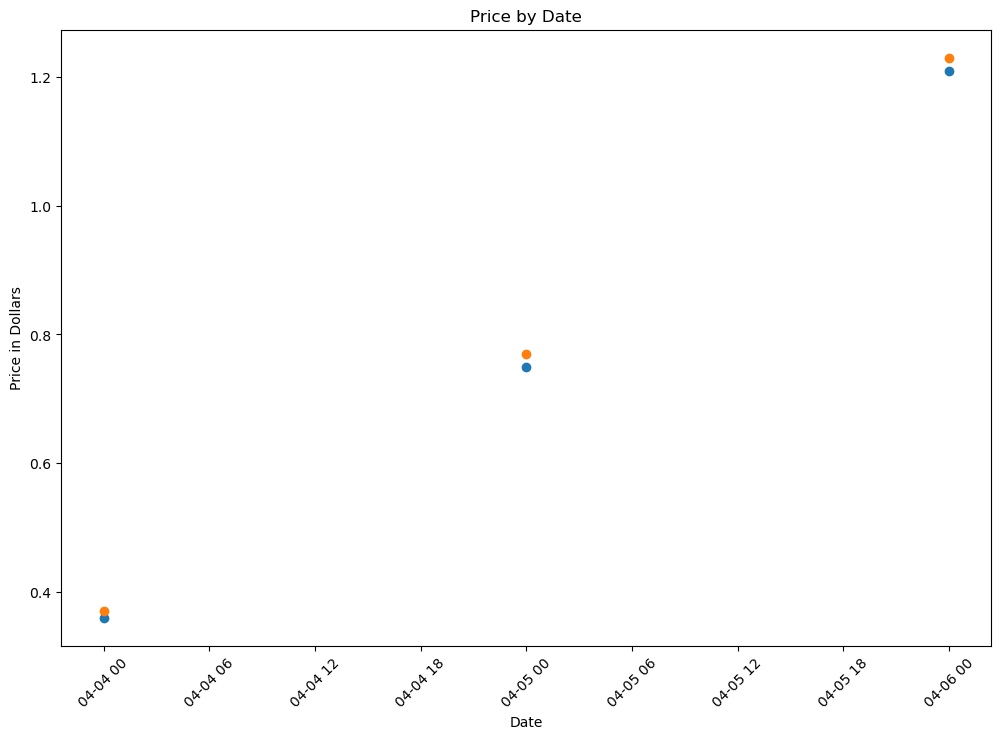

In [30]:
plt.figure(figsize=(12,8))

plt.scatter(p9.date,
         p9.best_bid,
         label = "Best Bid")

plt.scatter(p9.date,
         p9.best_offer,
         label = "Best Offer")

plt.xticks(rotation=45)
plt.yticks

plt.title("Price by Date")
plt.xlabel("Date")
plt.ylabel("Price in Dollars")
plt.legend

plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

In [2]:
from scipy.stats import norm

In [3]:
## Where:
## S = the current stock price
## K = the strike price of the option
## r = the risk-free-rate
## T = time to maturity, or time to expiration
## sigma = annualized volatility of the asset's returns
## N = A normal distribution

def BS_CALL(S,K,T,r,sigma):
    N = norm.cdf
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*N(d1) - K*np.exp(-r*T)*N(d2)

In [4]:
def BS_PUT(S,K,T,r,sigma):
    N = norm.cdf
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

In [5]:
options = pd.read_csv("options_data.csv",parse_dates=['date','exdate','last_date'])
pd.set_option('display.max_columns', None)
options = options[["date","symbol","exdate","last_date","strike_price","best_bid","best_offer","volume","open_interest","impl_volatility","delta","gamma","theta","vega","optionid","ticker"]]
options['strike_price'] = [float(i) for i in options['strike_price']]
options['strike_price'] = [i*.001 for i in options['strike_price']]
for j in options.columns[-12:-2]:
    options[j] = [float(i) for i in options[j]]
    
amd_stock = pd.read_csv("AMD.csv", parse_dates=['Date'])
amd_stock['date'] = amd_stock.Date
amd_stock = amd_stock[['date','Open','High','Low','Close','Adj Close','Volume']]
amd_stock['ticker'] = ['AMD' for i in range(252)]
smci_stock = pd.read_csv("SMCI.csv", parse_dates=['Date'])
smci_stock['date'] = smci_stock.Date
smci_stock = smci_stock[['date','Open','High','Low','Close','Adj Close','Volume']]
smci_stock['ticker'] = ['SMCI' for i in range(252)]
nvda_stock = pd.read_csv("NVDA.csv",parse_dates=['Date'])
nvda_stock['date'] = nvda_stock.Date
nvda_stock = nvda_stock[['date','Open','High','Low','Close','Adj Close','Volume']]
nvda_stock['ticker'] = ['NVDA' for i in range(252)]
tsm_stock = pd.read_csv("TSM.csv",parse_dates=['Date'])
tsm_stock['date'] = tsm_stock.Date
tsm_stock = tsm_stock[['date','Open','High','Low','Close','Adj Close','Volume']]
tsm_stock['ticker'] = ['TSM' for i in range(252)]
stock_price_data = pd.concat([amd_stock,nvda_stock,tsm_stock,smci_stock],axis=0)
options = pd.merge(options,stock_price_data,on=['date','ticker'],how='outer')
options['days_to_expiration'] = options.exdate-options.date
options['bid/ask_spread'] = options.best_offer-options.best_bid
rf_interest_rate = pd.read_csv("TNX.csv",parse_dates=['Date'])
rf_interest_rate['date'] = rf_interest_rate.Date
rf_interest_rate = rf_interest_rate[['date','Open']]
options = pd.merge(options,rf_interest_rate,on=['date'],how='outer')
options.rename(columns={'Open_x':'stock_open','High':'stock_high','Low':'stock_low','Close':'stock_close','Open_y':'risk_free_rate','Adj Close':'stock_adj_close'},inplace=True)
options = options.sort_values(['symbol','date'])
options = options.dropna(subset=['symbol'])
options = options[options.days_to_expiration.dt.days < 50]
options = options[options.days_to_expiration.dt.days > 7]
options['sigma_open'] = options.stock_open*options.impl_volatility*np.sqrt(options.days_to_expiration.dt.days)/365
options['sigma_high'] = options.stock_high*options.impl_volatility*np.sqrt(options.days_to_expiration.dt.days)/365
options['sigma_low'] = options.stock_low*options.impl_volatility*np.sqrt(options.days_to_expiration.dt.days)/365
options['sigma_close'] = options.stock_close*options.impl_volatility*np.sqrt(options.days_to_expiration.dt.days)/365
options['sigma_adj_close'] = options.stock_adj_close*options.impl_volatility*np.sqrt(options.days_to_expiration.dt.days)/365
options['c_premium_open'] = BS_CALL(S=options.stock_open,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_open)
options['c_premium_high'] = BS_CALL(S=options.stock_high,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_high)
options['c_premium_low'] = BS_CALL(S=options.stock_low,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_low)
options['c_premium_close'] = BS_CALL(S=options.stock_close,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_close)
options['c_premium_adj_close'] = BS_CALL(S=options.stock_adj_close,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_adj_close)
options['p_premium_open'] = BS_PUT(S=options.stock_open,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_open)
options['p_premium_high'] = BS_PUT(S=options.stock_high,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_high)
options['p_premium_low'] = BS_PUT(S=options.stock_low,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_low)
options['p_premium_close'] = BS_PUT(S=options.stock_close,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_close)
options['p_premium_adj_close'] = BS_PUT(S=options.stock_adj_close,K=options.strike_price,T=options.days_to_expiration.dt.days,r=options.risk_free_rate,sigma=options.sigma_adj_close)


C:\Users\petso\AppData\Local\Temp\ipykernel_4852\3889478323.py:1: DtypeWarning: Columns (23,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  options = pd.read_csv("options_data.csv",parse_dates=['date','exdate','last_date'])


In [13]:
options

,date,symbol,exdate,last_date,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,theta,vega,optionid,ticker,stock_open,stock_high,stock_low,stock_close,stock_adj_close,Volume,days_to_expiration,bid/ask_spread,risk_free_rate,sigma_open,sigma_high,sigma_low,sigma_close,sigma_adj_close,c_premium_open,c_premium_high,c_premium_low,c_premium_close,c_premium_adj_close,p_premium_open,p_premium_high,p_premium_low,p_premium_close,p_premium_adj_close
71,2022-02-28,AMD 220311C100000,2022-03-11,2022-02-28,100.0,21.50,25.10,106.0,163.0,NaN,NaN,NaN,NaN,NaN,145051020.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,11 days,3.60,1.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,2022-03-01,AMD 220311C100000,2022-03-11,2022-03-01,100.0,14.60,15.05,130.0,237.0,0.742810,0.867749,0.015297,-55.059220,4.034842,145051020.0,AMD,122.330002,122.430000,112.800003,113.830002,113.830002,126552200.0,10 days,0.45,1.734,0.787259,0.787903,0.725929,0.732557,0.732557,122.329999,122.429997,112.800000,113.829999,113.829999,2.816490e-15,2.930636e-15,3.975122e-17,6.620583e-17,6.620583e-17
13430,2022-03-02,AMD 220311C100000,2022-03-11,2022-03-02,100.0,18.05,19.75,163.0,324.0,0.812607,0.916249,0.010199,-47.510990,2.858985,145051020.0,AMD,115.470001,119.480003,113.309998,118.279999,118.279999,118354500.0,9 days,1.70,1.777,0.771220,0.798002,0.756793,0.789988,0.789988,115.469990,119.479992,113.309987,118.279988,118.279988,9.297951e-15,4.499241e-14,3.721099e-15,2.851964e-14,2.851964e-14
20056,2022-03-03,AMD 220311C100000,2022-03-11,2022-03-03,100.0,12.70,12.90,191.0,267.0,0.713740,0.869569,0.017921,-57.614500,3.516040,145051020.0,AMD,118.129997,118.260002,111.050003,111.980003,111.980003,123916700.0,8 days,0.20,1.847,0.653360,0.654079,0.614201,0.619345,0.619345,118.129959,118.259964,111.049965,111.979965,111.979965,3.041251e-18,3.260982e-18,4.783732e-20,8.611063e-20,8.611063e-20
72,2022-02-28,AMD 220311C101000,2022-03-11,2022-02-25,101.0,20.80,24.00,0.0,59.0,0.518948,0.988255,0.002763,-6.103001,0.657896,145082579.0,AMD,120.309998,124.610001,119.199997,123.339996,123.339996,124666100.0,11 days,3.20,1.917,0.567321,0.587598,0.562087,0.581609,0.581609,120.309998,124.610001,119.199997,123.339996,123.339996,2.022550e-33,1.376435e-31,6.332946e-34,4.135494e-32,4.135494e-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385792,2023-02-28,TSM 230406P98000,2023-04-06,NaT,98.0,11.20,11.45,0.0,0.0,0.273283,-0.914952,0.021800,-2.356367,4.130858,152862432.0,TSM,87.139999,88.150002,86.900002,87.070000,85.064484,7520400.0,37 days,0.25,3.947,0.396861,0.401461,0.395768,0.396542,0.387408,87.139999,88.150002,86.900002,87.070000,85.064484,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1371148,2023-02-23,TSM 230406P99000,2023-04-06,NaT,99.0,9.80,10.15,0.0,0.0,0.318504,-0.798638,0.029829,-8.830298,8.419382,152862433.0,TSM,90.300003,91.989998,89.459999,90.080002,88.005150,15468300.0,42 days,0.35,3.941,0.510663,0.520220,0.505913,0.509419,0.497685,90.300003,91.989998,89.459999,90.080002,88.005150,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1376252,2023-02-24,TSM 230406P99000,2023-04-06,NaT,99.0,11.55,12.60,0.0,0.0,0.384510,-0.803537,0.025073,-10.907870,8.020048,152862433.0,TSM,88.089996,88.150002,87.239998,88.110001,86.080528,8817600.0,41 days,1.05,3.916,0.594201,0.594606,0.588467,0.594336,0.580646,88.089996,88.150002,87.239998,88.110001,86.080528,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1381019,2023-02-27,TSM 230406P99000,2023-04-06,NaT,99.0,12.15,12.40,0.0,0.0,0.321879,-0.884294,0.022559,-5.158288,5.277360,152862433.0,TSM,88.699997,88.849998,87.239998,87.300003,85.289185,10609400.0,38 days,0.25,3.967,0.482187,0.483002,0.474250,0.474576,0.463645,88.699997,88.849998,87.239998,87.300003,85.289185,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,